In [4]:
#-------Import Dependencies-------#
%matplotlib inline
import pandas as pd
import os,shutil,math,scipy,cv2
import numpy as np
import matplotlib.pyplot as plt
import random as rn


from sklearn.utils import shuffle
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix,roc_curve,auc

from PIL import Image
from PIL import Image as pil_image
from PIL import ImageDraw

from time import time
from glob import glob
from tqdm import tqdm
from skimage.io import imread
from IPython.display import SVG

from scipy import misc,ndimage
from scipy.ndimage.interpolation import zoom
from scipy.ndimage import imread


from keras import backend as K
from keras.utils.np_utils import to_categorical
from keras import layers
from keras.preprocessing.image import save_img
from keras.utils.vis_utils import model_to_dot
from keras.applications.vgg19 import VGG19,preprocess_input
from keras.applications.mobilenet_v2 import MobileNetV2 
from keras.applications.xception import Xception
from keras.applications.nasnet import NASNetMobile
from keras.models import Sequential,Input,Model
from keras.layers import Dense,Flatten,Dropout,Concatenate,GlobalAveragePooling2D,Lambda,ZeroPadding2D
from keras.layers import SeparableConv2D,BatchNormalization,MaxPooling2D,Conv2D
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam,SGD
from keras.utils.vis_utils import plot_model
from keras.callbacks import ModelCheckpoint,EarlyStopping,TensorBoard,CSVLogger,ReduceLROnPlateau,LearningRateScheduler
from keras import models
from keras import layers
from keras import optimizers

Using TensorFlow backend.


In [5]:
# os.chdir("C:\\Users\\Janek\\Desktop\\EITI\\SNR\\klasyfikacja psów\\code")
os.chdir("C:\\Users\\Piotr\\Documents\\Studia\\Informatyka PW\\2 semestr\\SNR\\Projekt")

In [6]:
def show_final_history(history):
    fig, ax = plt.subplots(1, 2, figsize=(15,5))
    ax[0].set_title('loss')
    ax[0].plot(history.epoch, history.history["loss"], label="Train loss")
    ax[0].plot(history.epoch, history.history["val_loss"], label="Validation loss")
    ax[1].set_title('acc')
    ax[1].plot(history.epoch, history.history["acc"], label="Train acc")
    ax[1].plot(history.epoch, history.history["val_acc"], label="Validation acc")
    ax[0].legend()
    ax[1].legend()

In [7]:
def label_assignment(img,label):
    return label

def training_data(label,data_dir):
    for img in tqdm(os.listdir(data_dir)):
        label = label_assignment(img,label)
        path = os.path.join(data_dir,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img,(imgsize,imgsize))
        
        X.append(np.array(img))
        Z.append(str(label))

In [36]:
image_dir = '../input/images/Images/' 

# chihuahua_dir = '../input/images/Images/n02085620-Chihuahua'
# japanese_spaniel_dir = '../input/images/Images/n02085782-Japanese_spaniel'
# maltese_dir = '../input/images/Images/n02085936-Maltese_dog'
# pekinese_dir = '../input/images/Images/n02086079-Pekinese'
# shitzu_dir = '../input/images/Images/n02086240-Shih-Tzu'
# blenheim_spaniel_dir = '../input/images/Images/n02086646-Blenheim_spaniel'
# papillon_dir = '../input/images/Images/n02086910-papillon'
# toy_terrier_dir = '../input/images/Images/n02087046-toy_terrier'
# afghan_hound_dir = '../input/images/Images/n02088094-Afghan_hound'
# basset_dir = '../input/images/Images/n02088238-basset'

dirs = os.listdir(image_dir)

X = []
Z = []
imgsize = 224

In [37]:
for dir_name in dirs:
    full_dir = os.path.join(image_dir, dir_name)
    label = dir_name.split(sep='-', maxsplit=1)[1]
    training_data(label, full_dir)
    
# training_data('chihuahua',chihuahua_dir)
# training_data('japanese_spaniel',japanese_spaniel_dir)
# training_data('maltese',maltese_dir)
# training_data('pekinese',pekinese_dir)
# training_data('shitzu',shitzu_dir)
# training_data('blenheim_spaniel',blenheim_spaniel_dir)
# training_data('papillon',papillon_dir)
# training_data('toy_terrier',toy_terrier_dir)
# training_data('afghan_hound',afghan_hound_dir)
# training_data('basset',basset_dir)

100%|██████████| 169/169 [00:02<00:00, 73.06it/s]


In [38]:
X = np.array(X)
# moved to image data generator
# X=X/255
label_encoder= LabelEncoder()
Y = label_encoder.fit_transform(Z)
# Y = to_categorical(Y,len(dirs))
del Z

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=69)
del X
del Y 

In [39]:
augs_gen = ImageDataGenerator(
        rescale=1./255,
        featurewise_center=False,  
        samplewise_center=False, 
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False,  
        rotation_range=0,  
        zoom_range = 0, 
        width_shift_range=0,  
        height_shift_range=0, 
        horizontal_flip=False,  
        vertical_flip=False) 

augs_gen.fit(x_train)

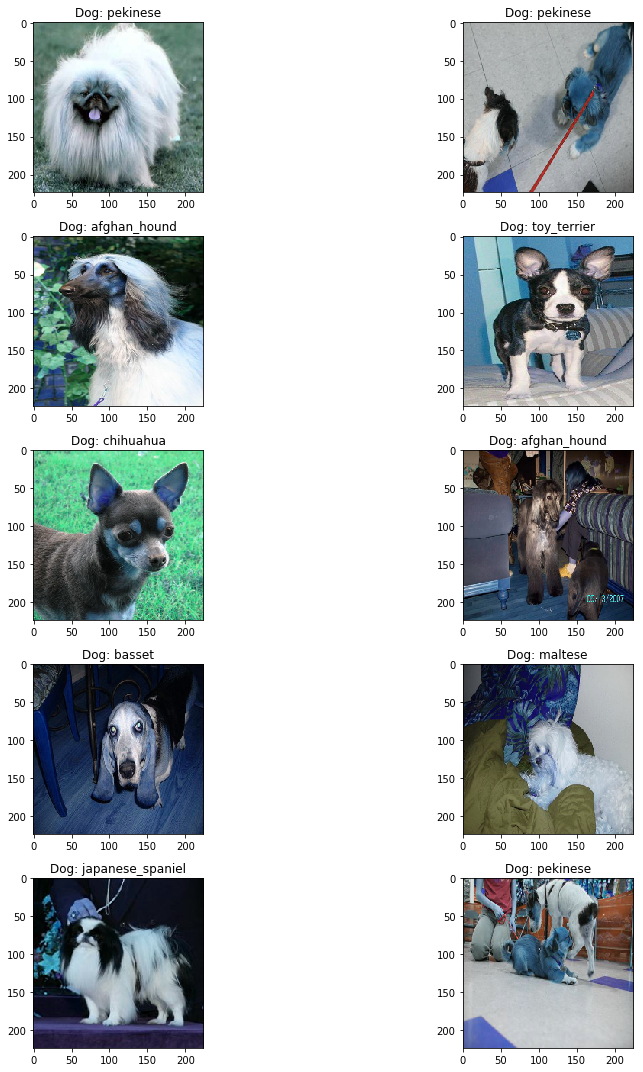

In [9]:
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Dog: '+Z[l])
        
plt.tight_layout()

In [11]:
base_model = VGG19(include_top=True,
                  input_shape = (imgsize,imgsize,3),
                  weights = 'imagenet')

for layer in base_model.layers:
    layer.trainable = False

for layer in base_model.layers:
    print(layer,layer.trainable)

model = Sequential()
model.add(base_model)
model.add(layers.Dense(10, activation='softmax'))
model.summary()

SVG(model_to_dot(model).create(prog='dot', format='svg'))
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

Instructions for updating:
Colocations handled automatically by placer.
<keras.engine.input_layer.InputLayer object at 0x0000010FCF5B9550> False
<keras.layers.convolutional.Conv2D object at 0x0000010FCF5B9F98> False
<keras.layers.convolutional.Conv2D object at 0x0000010FCF5B9390> False
<keras.layers.pooling.MaxPooling2D object at 0x0000010FC5585DD8> False
<keras.layers.convolutional.Conv2D object at 0x0000010FCF5B0A90> False
<keras.layers.convolutional.Conv2D object at 0x0000010FCF50BC50> False
<keras.layers.pooling.MaxPooling2D object at 0x0000010F80026828> False
<keras.layers.convolutional.Conv2D object at 0x0000010F80026860> False
<keras.layers.convolutional.Conv2D object at 0x0000010F80056208> False
<keras.layers.convolutional.Conv2D object at 0x0000010F8006F278> False
<keras.layers.convolutional.Conv2D object at 0x0000010F800A3B70> False
<keras.layers.pooling.MaxPooling2D object at 0x0000010F800B60B8> False
<keras.layers.convolutional.Conv2D object at 0x0000010F800B69E8> False
<ke

In [ ]:
# Load VGG19 - do once to avoid gpu memory overflow
# base_model = VGG19(include_top=True,
#                   input_shape = (imgsize,imgsize,3),
#                   weights = 'imagenet')


In [40]:
# Load MobileNet
# Do not include the top layer - it is a classifier for 1000 classes with imagenet dataset
base_model = MobileNetV2(input_shape=(imgsize, imgsize, 3) , weights='imagenet', include_top=False, classes=len(dirs))
# Create own classifier head
model = Sequential()
model.add(base_model)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(len(dirs), activation='softmax', use_bias=True, name='Logits'))

In [27]:
# Punkt 1
# classification_layers_names = ['fc1', 'fc2', 'predictions']
classification_layers_names = ['Logits']

for layer in model.layers:
    if layer.get_config()['name'] in classification_layers_names:
        layer.trainable = True
    else:
        layer.trainable = False

# for layer in model.layers:
#     print(layer,layer.trainable, layer.get_config())
    
model.summary()

SVG(model_to_dot(model).create(prog='dot', format='svg'))
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Model) (None, 7, 7, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d_1 ( (None, 1280)              0         
_________________________________________________________________
Logits (Dense)               (None, 2)                 2562      
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [16]:
#Punkt 2
# layers_to_train = ['fc1', 'fc2', 'predictions', 'block5_conv4']
layers_to_train = ['Logits', 'Conv_1']

for layer in model.layers:
    if layer.get_config()['name'] in layers_to_train:
        layer.trainable = True
    else:
        layer.trainable = False

for layer in model.layers:
    print(layer,layer.trainable, layer.get_config())
    
model.summary()

SVG(model_to_dot(model).create(prog='dot', format='svg'))
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

<keras.engine.input_layer.InputLayer object at 0x0000010FCF5B9550> False {'batch_input_shape': (None, 224, 224, 3), 'dtype': 'float32', 'sparse': False, 'name': 'input_1'}
<keras.layers.convolutional.Conv2D object at 0x0000010FCF5B9F98> False {'name': 'block1_conv1', 'trainable': False, 'filters': 64, 'kernel_size': (3, 3), 'strides': (1, 1), 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': (1, 1), 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}
<keras.layers.convolutional.Conv2D object at 0x0000010FCF5B9390> False {'name': 'block1_conv2', 'trainable': False, 'filters': 64, 'kernel_size': (3, 3), 'strides': (1, 1), 'padding': 'same', 'data_for

In [42]:
checkpoint = ModelCheckpoint(
    './base.model',
    monitor='val_loss',
    verbose=1,
    save_best_only=True,
    mode='min',
    save_weights_only=False,
    period=1
)
earlystop = EarlyStopping(
    monitor='val_loss',
    min_delta=0.001,
    patience=30,
    verbose=1,
    mode='auto'
)
tensorboard = TensorBoard(
    log_dir = './logs',
    histogram_freq=0,
    batch_size=16,
    write_graph=True,
    write_grads=True,
    write_images=False,
)

csvlogger = CSVLogger(
    filename= "training_csv.log",
    separator = ",",
    append = False
)

reduce = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=3,
    verbose=1, 
    mode='auto'
)

callbacks = [checkpoint,tensorboard,csvlogger,reduce]

In [43]:
#-----------Optimizers-----------#
opt = SGD(lr=1e-4,momentum=0.99)
opt1 = Adam(lr=1e-2)
#----------Compile---------------#
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)
#-----------Training------------#
history = model.fit_generator(
    augs_gen.flow(x_train,y_train,batch_size=16),
    validation_data  = (x_test,y_test),
    validation_steps = 2,
    steps_per_epoch  = 2,
    epochs = 1, 
    verbose = 1,
    callbacks=callbacks
)

Epoch 1/1


ResourceExhaustedError: OOM when allocating tensor with shape[16,7,7,160] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node training_2/Adam/gradients/zeros_41}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.

	 [[{{node loss_3/mul}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.


In [ ]:
show_final_history(history)
model.load_weights('./base.model')
model_score = model.evaluate(x_test,y_test)
print("Model Test Loss:",model_score[0])
print("Model Test Accuracy:",model_score[1])

model_json = model.to_json()
with open("model.json","w") as json_file:
    json_file.write(model_json)
    
model.save("model.h5")
print("Weights Saved")

In [ ]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip
LOG_DIR = './logs' # Here you have to put your log directory
get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 8080 &'
    .format(LOG_DIR)
)
get_ipython().system_raw('./ngrok http 8080 &')
! curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"